**Pandas Challenges**


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`


---


**Challenge 1**

Plot domestic total gross over time.


**Challenge 2**

Plot runtime vs. domestic total gross.


**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


**Challenge 5**

What director in your dataset has the highest gross per movie?


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."


In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("2013_movies.csv")  #, header=None, names=['date', 'price'])


In [13]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [5]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


## Challenge 1
Plot domestic total gross over time.


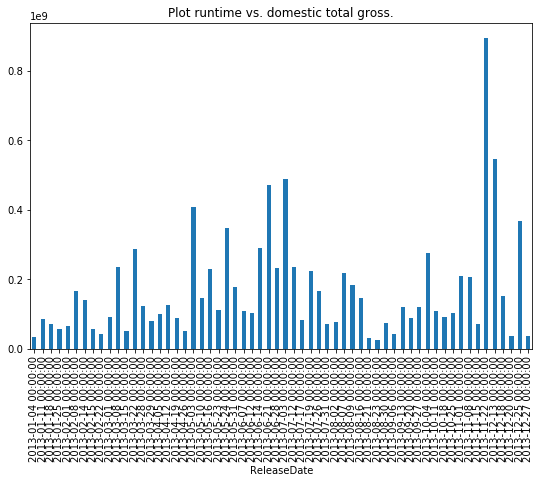

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.title('Plot runtime vs. domestic total gross.')

df.groupby('ReleaseDate').DomesticTotalGross.sum().plot(kind='bar')

### Challenge 2
Plot runtime vs. domestic total gross.

(array([ 47.,  21.,  15.,   3.,   3.,   4.,   3.,   0.,   1.,   3.]),
 array([  2.55682510e+07,   6.54782306e+07,   1.05388210e+08,
          1.45298190e+08,   1.85208169e+08,   2.25118149e+08,
          2.65028129e+08,   3.04938108e+08,   3.44848088e+08,
          3.84758067e+08,   4.24668047e+08]),
 <a list of 10 Patch objects>)

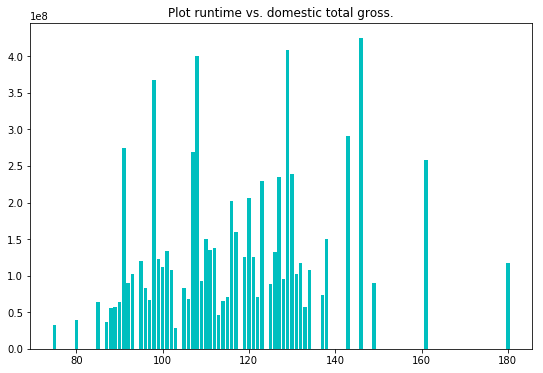

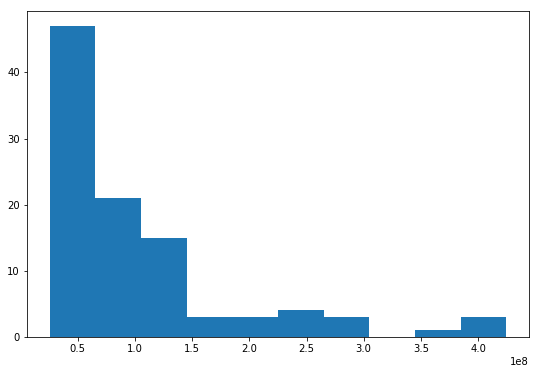

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.title('Plot runtime vs. domestic total gross.')

plt.bar( df.Runtime.sort_values(ascending=True), 
         df.DomesticTotalGross, 
         color='c')


plt.figure(figsize=(9,6))
plt.hist(df.DomesticTotalGross.sort_values())



## Challenge 3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [131]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [137]:
df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()


,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### Challenge 4
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gros

['PG-13', 'R', 'PG', 'G']


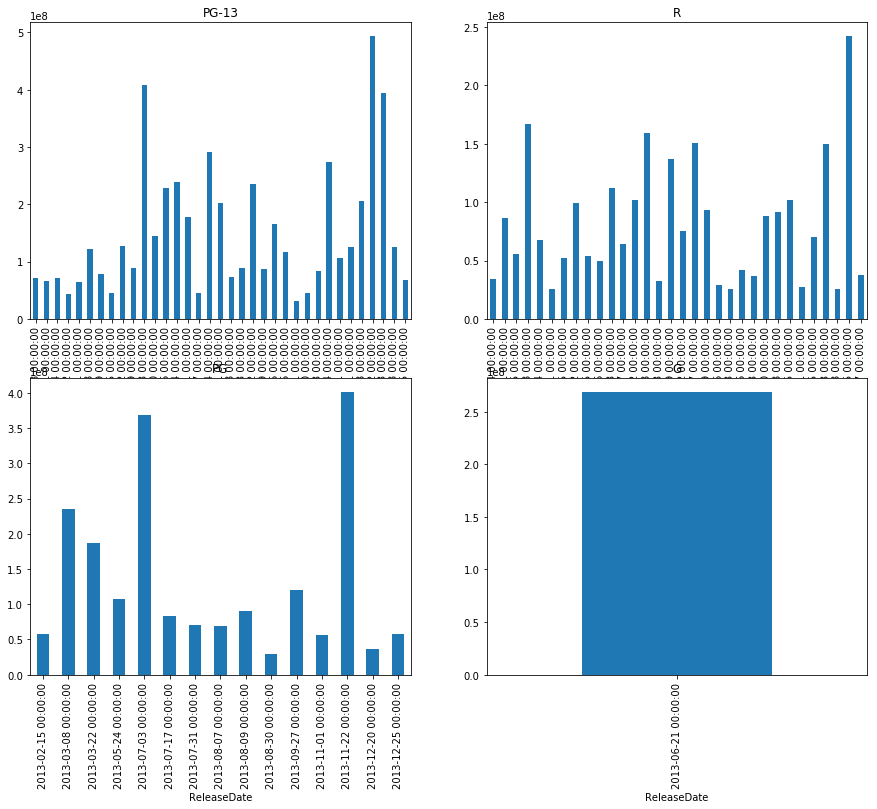

In [342]:
import matplotlib.pyplot as plt

z = df.Rating.value_counts().reset_index()
rating_list = [x for x in z['index']]
print(rating_list)


plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
for i, rating in enumerate(rating_list):
    plt.subplot(2,2,(i+1))

    df[ df.Rating == rating].groupby('ReleaseDate').DomesticTotalGross.sum().plot(kind='bar')

    #plt.plot(x, y2)
    plt.title(rating)


# =============== 444444444444444

In [333]:
df[df.Rating=='R'].groupby('ReleaseDate').DomesticTotalGross.sum()


ReleaseDate
2013-01-04 00:00:00     34341945
2013-01-11 00:00:00     86042586
2013-01-25 00:00:00     55703475
2013-02-08 00:00:00    166679677
2013-02-14 00:00:00     67349198
2013-03-01 00:00:00     25682380
2013-03-15 00:00:00     51872378
2013-03-22 00:00:00     98925640
2013-04-05 00:00:00     54239856
2013-04-26 00:00:00     49875291
2013-05-23 00:00:00    112200072
2013-06-07 00:00:00     64473115
2013-06-12 00:00:00    101470202
2013-06-28 00:00:00    159582188
2013-07-03 00:00:00     32244051
2013-07-19 00:00:00    137400141
2013-08-02 00:00:00     75612460
2013-08-07 00:00:00    150394119
2013-08-09 00:00:00     93050117
2013-08-16 00:00:00     28795985
2013-08-23 00:00:00     26004851
2013-09-06 00:00:00     42025135
2013-09-13 00:00:00     36918811
2013-09-20 00:00:00     87949926
2013-10-18 00:00:00     91938612
2013-10-25 00:00:00    102003019
2013-11-01 00:00:00     27298285
2013-11-15 00:00:00     70525195
2013-12-13 00:00:00    150117807
2013-12-18 00:00:00     2556825

type= <class 'tuple'>
type= <class 'tuple'>
type= <class 'tuple'>
type= <class 'tuple'>


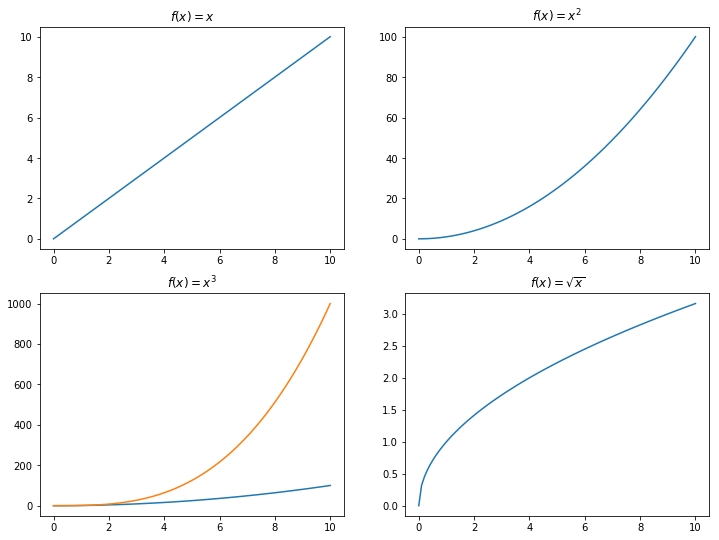

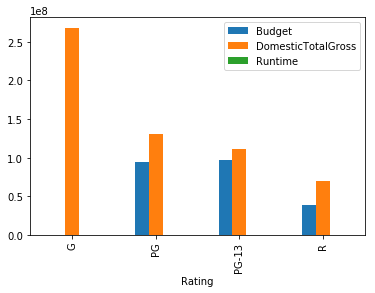

In [173]:
#df.groupby('Rating')['ReleaseDate','DomesticTotalGross'].mean()

x = np.linspace(0,10,100)

y1 = x
y2 = x**2
y3 = x**3
y4 = x**0.5


plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.title('$f(x)=x$')

plt.subplot(2,2,2)
plt.plot(x,y2)
plt.title('$f(x)=x^2$')

plt.subplot(2,2,3)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('$f(x)=x^3$')

plt.subplot(2,2,4)
plt.plot(x,y4)
plt.title('$f(x)=\sqrt{x}$')


for g in df.groupby('Rating'):
    print('type=', type(g) )

    
df.groupby("Rating").mean().plot(kind='bar')

In [307]:
df[ (df.Rating == 'R')][['Rating','ReleaseDate','DomesticTotalGross']]


,Rating,ReleaseDate,DomesticTotalGross
14,R,2013-06-28 00:00:00,159582188
15,R,2013-08-07 00:00:00,150394119
16,R,2013-12-13 00:00:00,150117807
18,R,2013-07-19 00:00:00,137400141
19,R,2013-02-08 00:00:00,134506920
23,R,2013-12-25 00:00:00,125095601
27,R,2013-12-25 00:00:00,116900694
29,R,2013-05-23 00:00:00,112200072
32,R,2013-10-25 00:00:00,102003019
34,R,2013-06-12 00:00:00,101470202


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.title('Plot runtime vs. domestic total gross.')

df.groupby('ReleaseDate').DomesticTotalGross.sum().plot(kind='bar')



### Challenge 5
What director in your dataset has the highest gross per movie?


In [197]:
(df.groupby('Director')
    .DomesticTotalGross.mean()
    .sort_values( ascending=False )
    .reset_index()
    .head(1))



,Director,DomesticTotalGross
0,Francis Lawrence,424668047


### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
Title of graph should include: Mean Domestic Total Gross by Month in 2013
Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."


In [213]:
df.ReleaseDate[:5] #.dt.month() #apply(lambda x: x.strftime('%B-%Y'))

0    2013-11-22 00:00:00
1    2013-05-03 00:00:00
2    2013-11-22 00:00:00
3    2013-07-03 00:00:00
4    2013-06-14 00:00:00
Name: ReleaseDate, dtype: object

,ReleaseMonth,DomesticTotalGross
0,1,4.954324e+07
1,2,6.738601e+07
2,3,9.609710e+07
3,4,6.094072e+07
4,5,1.774097e+08
5,6,1.506500e+08
6,7,1.057807e+08
7,8,6.853126e+07
8,9,6.171231e+07
9,10,1.150270e+08


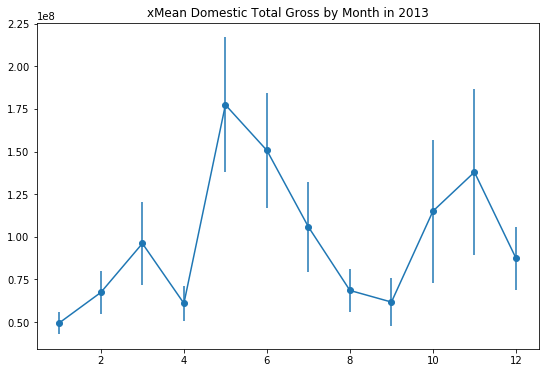

In [254]:
# create release month colum
df['ReleaseMonth'] = pd.to_datetime(df.ReleaseDate, format='%Y-%m-%d', errors='ignore').dt.month


x = np.linspace(0,10,100)

y1 = x
y2 = x**2
y3 = x**3
y4 = x**0.5


df2 = df.groupby('ReleaseMonth')['DomesticTotalGross'].mean().reset_index()

yerr = df.groupby('ReleaseMonth')['DomesticTotalGross'].sem()

plt.figure(figsize=(9,6))
plt.errorbar(df2.ReleaseMonth, 
             df2.DomesticTotalGross,
             yerr=yerr,
             fmt='-o')
plt.title('xMean Domestic Total Gross by Month in 2013')

#plt.title('$f(x)=x$')
df2

In [244]:
df.groupby('ReleaseMonth')['DomesticTotalGross'].sem()

ReleaseMonth
1     6.555914e+06
2     1.240927e+07
3     2.441314e+07
4     1.032911e+07
5     3.951859e+07
6     3.365826e+07
7     2.638732e+07
8     1.245915e+07
9     1.421654e+07
10    4.201272e+07
11    4.857293e+07
12    1.853759e+07
Name: DomesticTotalGross, dtype: float64